In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
data = pd.read_csv('student_sleep_patterns.csv')

# Preprocessing: Convert columns as necessary
data['Physical_Activity'] = data['Physical_Activity'] / 60

# Feature selection
features = ['Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality']
target = 'Stress_Level'

# Compute mean and categorize stress level
data['Mean'] = data[features].mean(axis=1)
data['Stress_Level'] = pd.cut(
    data['Mean'], 
    bins=[0, 3, 6, 10], 
    labels=['Low', 'Medium', 'High']
)

# Prepare dataset for training
X = data[features]
y = data['Stress_Level']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

In [5]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Save results if necessary
data.to_csv('student_stress_results.csv', index=False)

Accuracy: 95.00%
Precision: 94.92%
Recall: 95.00%
Confusion Matrix:
 [[15  3]
 [ 2 80]]
Classification Report:
               precision    recall  f1-score   support

         Low       0.88      0.83      0.86        18
      Medium       0.96      0.98      0.97        82

    accuracy                           0.95       100
   macro avg       0.92      0.90      0.91       100
weighted avg       0.95      0.95      0.95       100



In [6]:
# Print the selected columns
print(data[['Student_ID', 'Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality', 'Mean', 'Stress_Level']])


     Student_ID  Sleep_Duration  Study_Hours  Screen_Time  Caffeine_Intake  \
0             1             7.7          7.9          3.4                2   
1             2             6.3          6.0          1.9                5   
2             3             5.1          6.7          3.9                5   
3             4             6.3          8.6          2.8                4   
4             5             4.7          2.7          2.7                0   
..          ...             ...          ...          ...              ...   
495         496             5.1          9.3          1.9                4   
496         497             8.9          7.7          3.5                3   
497         498             5.7          6.4          3.9                1   
498         499             4.9          0.5          3.5                0   
499         500             7.9         11.6          1.0                0   

     Physical_Activity  Sleep_Quality      Mean Stress_Level  


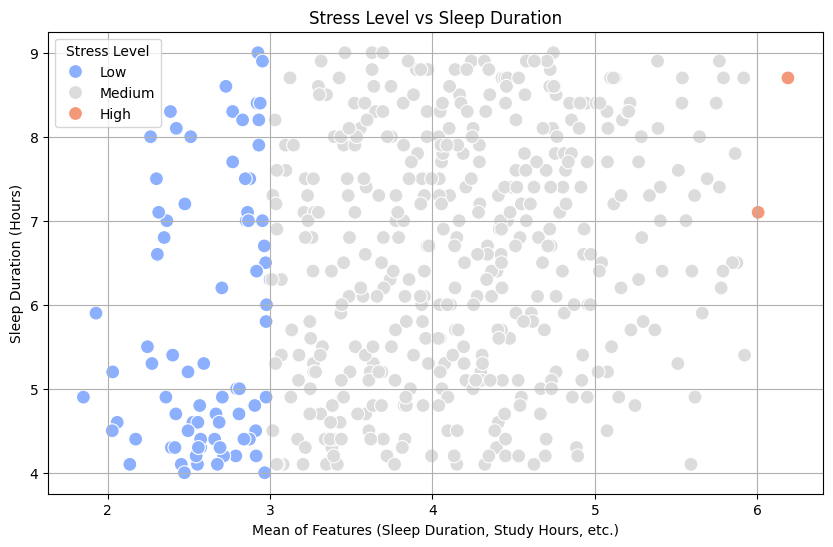

In [7]:
# Visualize the data (Stress Level vs Mean)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Mean', y='Sleep_Duration', hue='Stress_Level', palette='coolwarm', s=100, marker='o')
plt.title('Stress Level vs Sleep Duration')
plt.xlabel('Mean of Features (Sleep Duration, Study Hours, etc.)')
plt.ylabel('Sleep Duration (Hours)')
plt.legend(title='Stress Level')
plt.grid(True)
plt.show()

C:\Users\yesaa\AppData\Local\Temp\ipykernel_4324\1322477868.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stress_Level', data=data, palette='coolwarm')


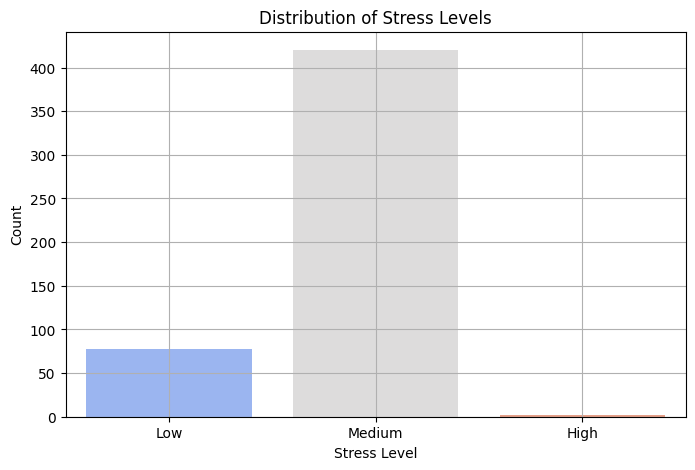

In [8]:
# Visualize Stress Level Distribution with Bar Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Stress_Level', data=data, palette='coolwarm')
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.grid(True)
plt.show()

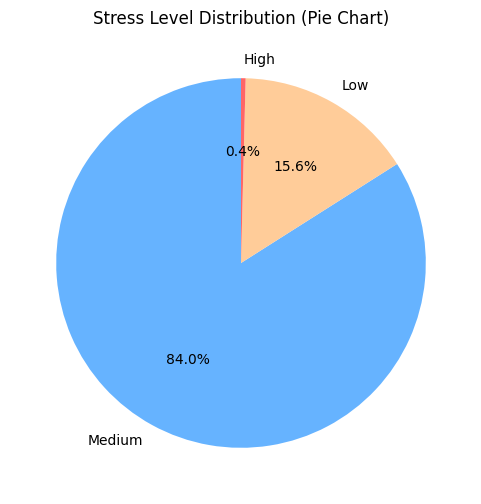

In [9]:
# Visualize Stress Level Distribution with Pie Chart
stress_level_counts = data['Stress_Level'].value_counts()
plt.figure(figsize=(6, 6))
stress_level_counts.plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#ffcc99', '#ff6666'], startangle=90)
plt.title('Stress Level Distribution (Pie Chart)')
plt.ylabel('')  # Hide y-label
plt.show()